# T2 Data
Water T2 data for samples C, D, and E

In [2]:
import pandas as pd
import numpy as np
from pathlib import Path

In [13]:
data_path = Path("/home/ben/Documents/Repos/382L_NMRLab/data/Feb 14/T2_conc_gly/D_replacement_data")
data_letter = "D"

In [14]:
data = pd.read_csv(data_path / "D1.csv", header=None)
for file in data_path.iterdir():
    if file.stem[0] == data_letter:
        print(file.stem)
        new_data = pd.read_csv(file, header=None)
        data = pd.merge_ordered(data, new_data)

thresh = 1
ad_chan1 = np.mean(data[1].values[:np.argwhere([a > thresh for a in np.diff(data[1].values)])[0][0]])
ad_chan2 = np.mean(data[2].values[:np.argwhere([a > thresh for a in np.diff(data[1].values)])[0][0]])

D8
D3
D6
D1
D7
D5
D2
D4


In [15]:
def mag(data):
    return np.sqrt(np.square(np.add(data[1].values, -ad_chan1)) + np.square(np.add(data[2].values, -ad_chan2)))

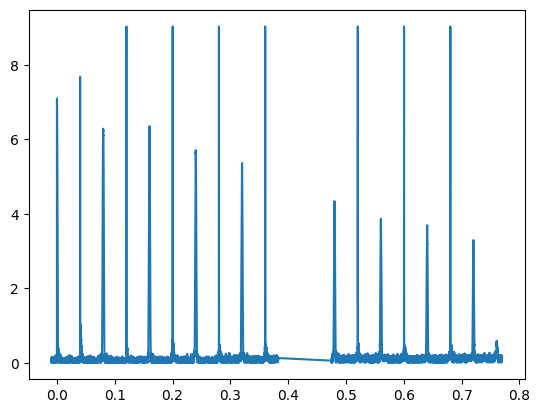

In [16]:
from matplotlib import pyplot as plt

plt.plot(data[0].values, mag(data))